## Lending Club Case Study

### Problem Statement
The objective of this case study is to perform exploratory data analysis (EDA) to identify patterns and understand how consumer attributes and loan attributes influence the tendency of loan default. The aim is to identify the variables that can help predict whether an applicant is likely to default or not. This information can be used by the consumer finance company to make loan approval decisions and mitigate the risk of financial loss due to defaults.


In [96]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 

In [97]:
#reading the loan data set
loan_df = pd.read_csv('loan.csv')

In [98]:
#checking the shape of the data set
loan_df.shape

(39717, 111)

In [99]:
#checking the first 5 rows of the data set
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [100]:
#checking the info of the data set
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [101]:
#checking the summary of the data set
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data Cleaning

#### Missing Value Treatment
We will first check the percentage of missing values in each column. If the percentage of missing values is more than 25%, we will drop the column. 

In [102]:
#calculating the percentage of null values in each column
loan_df.isnull().sum()/loan_df.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [103]:
#extacting the columns with more than 25% null values
null_columns = loan_df.columns[(loan_df.isnull().sum()/loan_df.shape[0]*100) > 25 ]

#checking the number of columns with more than 50% null values
len(null_columns)

58

In [104]:
#dropping the columns with more than 25% null values
loan_df.drop(null_columns, axis=1, inplace=True)

In [105]:
#checking the shape of the data set after dropping the columns
loan_df.shape

(39717, 53)

In [106]:
#checking the info of the data set after dropping the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [107]:
#checking the columns that has null values and the number of null values in each column
loan_df.isnull().sum()[loan_df.isnull().sum() > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

We will take care of rest of the missing values after removing the irrelevant columns and duplicate rows.

#### Removing irrelevant columns and rows
Columns like 'id', 'member_id', 'url', 'title', 'emp_title', 'zip_code' are irrelevant for the analysis and hence removed.  

In [108]:
#removing the columns which are not required for the analysis
loan_df.drop(['id','member_id','url','title', 'emp_title', 'zip_code'],axis=1,inplace=True)

Records with 'Current' status are removed as we cannot determine whether they will default or not.

In [109]:
#dropping the rows with 'Current'as the loan status
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid','Charged Off'])]

Columns with one unique value are removed as they do not add any value to the analysis.

In [110]:
#extracting the columns with only one unique value,
single_value_column =  list(loan_df.nunique()[loan_df.nunique() == 1].keys())
single_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [111]:
#dropping the columns with only one unique value
loan_df.drop(single_value_column, axis = 1, inplace = True)

In [112]:
#checking the shape of the data set
loan_df.shape

(38577, 36)

In [113]:
#checking the summary of the data set
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

Customer behaviour variables like 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' are also removed as they are not available at the time of loan application.

In [114]:
#removing the customer behaviour columns
loan_df.drop(['last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','total_acc','revol_bal','open_acc','inq_last_6mths','delinq_2yrs','earliest_cr_line'], axis = 1, inplace = True)

In [115]:
#checking the shape of the data set
loan_df.shape

(38577, 20)

#### Removing duplicate rows

In [116]:
#dropping duplicate rows
loan_df.drop_duplicates(inplace=True)

In [117]:
#checking the shape of the data set
loan_df.shape

(38577, 20)

There is no duplicate row in the dataset.

#### Imputing missing values

In [118]:
#checking the columns that have number of null values greater than 0
loan_df.isnull().sum()[loan_df.isnull().sum() > 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [119]:
#checking the value counts of the column 'emp_length'
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

We will impute the missing values in the following columns with the mode of the column as they will not affect the analysis. 
10+ years  for 'emp_length' and 0 for 'revol_util' columns.

In [120]:
#Imputing the null values in the column 'emp_length' with the mode value
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace=True)

In [121]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [122]:
#Imputing the null values in the column 'pub_rec_bankruptcies' with the mode value
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace=True)

#### Data Transformation and Formatting

Changing the datatype of 'int_rate' column from object to int.

In [123]:
#checking the value counts of int_rate column
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [124]:
#removing the % sign from the int_rate column and converting it to float
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','').astype(float)

In [125]:
#checking the value counts of int_rate column
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

Converting 'revol_util' column to float

In [126]:
#checking the value counts of revol_util column
loan_df['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [127]:
#removing the % sign from the revol_util column and converting it to float
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','').astype(float)

In [128]:
#diplaying the first 5 rows of the revol_util column
loan_df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [129]:
#converting the emp_length column to int wtih 0 for < 1 and 10 for 10+ years
loan_df['emp_length'] = loan_df['emp_length'].apply (lambda x : int(x.rstrip(' years').replace(' year','').replace('10+','10').replace('< 1','0')))

In [130]:
#checking the value counts of emp_length column
loan_df['emp_length'].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

Converting 'issue_d' column to datetime format

In [131]:
#converting the issue_d column to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [132]:
#checking the first 5 rows of the issue_d column
loan_df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

<Axes: >

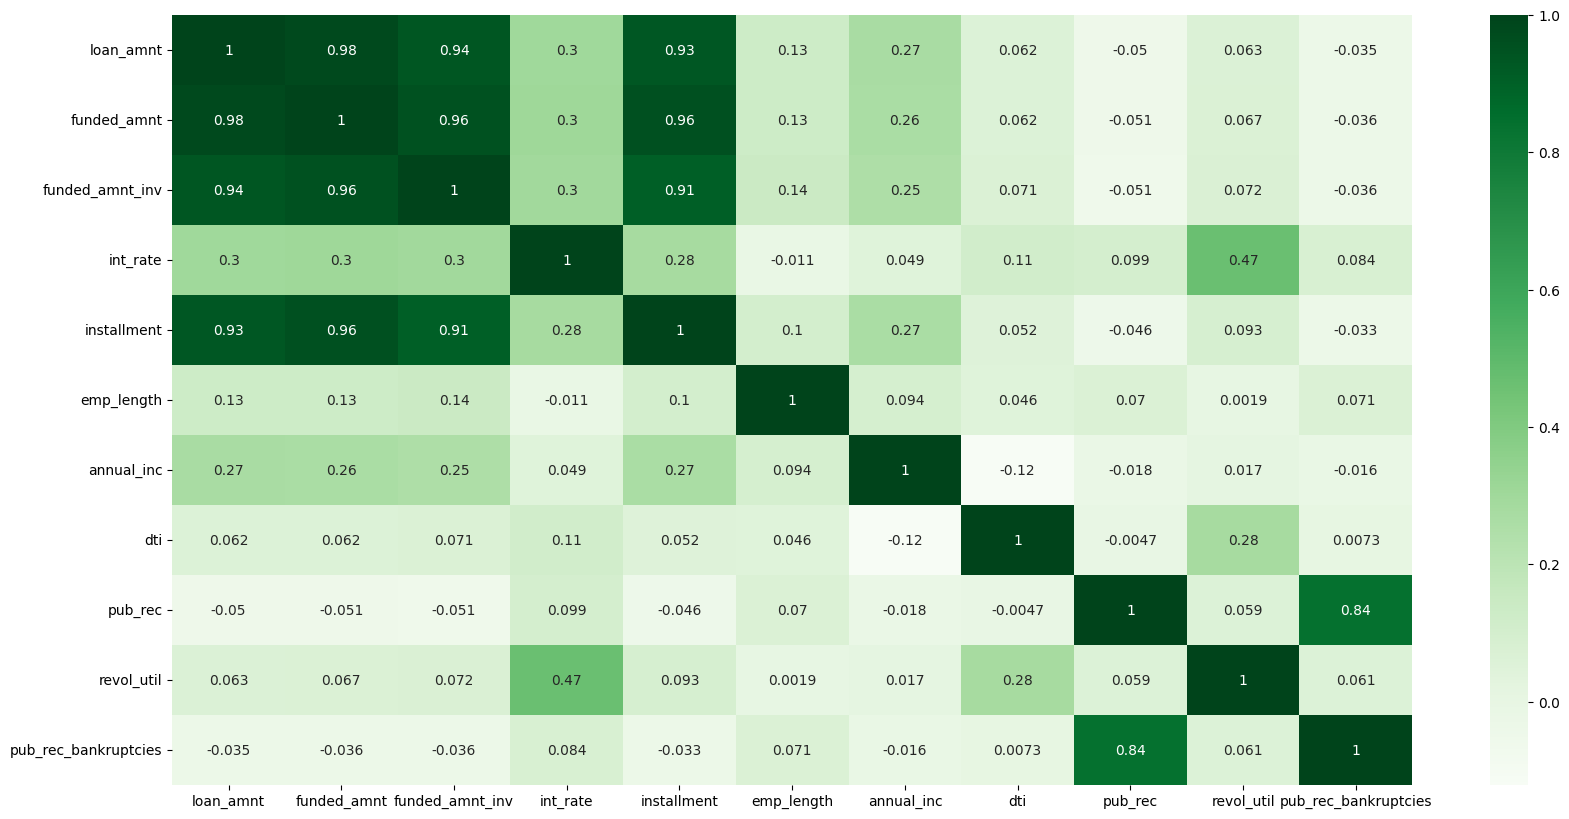

In [133]:
#checking the correlation between the columns
plt.figure(figsize=(20,10))
sns.heatmap(loan_df.corr(), annot=True, cmap='Greens')

In [134]:
#dropping the columns with high correlation
loan_df.drop(['funded_amnt','funded_amnt_inv','installment','pub_rec'],axis=1,inplace=True)

In [135]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   grade                 38577 non-null  object        
 4   sub_grade             38577 non-null  object        
 5   emp_length            38577 non-null  int64         
 6   home_ownership        38577 non-null  object        
 7   annual_inc            38577 non-null  float64       
 8   verification_status   38577 non-null  object        
 9   issue_d               38577 non-null  datetime64[ns]
 10  loan_status           38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  addr_state            38577 non-null  object        
 13  dti             

#### Derived Metrics


Adding new columns 'issue_year' and 'issue_month' to the dataset

In [136]:
#Adding new column 'issue_year' to the data set
loan_df['issue_year'] = loan_df['issue_d'].dt.year

#Adding new column 'issue_month' to the data set
loan_df['issue_month'] = loan_df['issue_d'].dt.month

#### Data Understanding

Numerical Variables:  
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util'

Categorical Variables:  
    'term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'issue_d', 'issue_year', 'issue_month'

Target Variable:  
    'loan_status'

In [137]:
#categorical columns
cat_cols = ['term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies' ,'addr_state', 'issue_d', 'issue_year', 'issue_month']

#numerical columns
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']

In [138]:
loan_df[num_cols].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_util
count,38577.000000,38577.000000,3.857700e+04,38577.000000,38527.000000
mean,11047.025430,11.932219,6.877797e+04,13.272727,48.702777
std,7348.441646,3.691327,6.421868e+04,6.673044,28.364741
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000
25%,5300.000000,8.940000,4.000000e+04,8.130000,25.200000
50%,9600.000000,11.710000,5.886800e+04,13.370000,49.100000
75%,15000.000000,14.380000,8.200000e+04,18.560000,72.300000
max,35000.000000,24.400000,6.000000e+06,29.990000,99.900000


In [139]:
loan_df[cat_cols].describe(include = 'object')

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state
count,38577,38577,38577,38577,38577,38577,38577,38577
unique,2,7,35,5,3,2,14,50
top,36 months,B,A4,RENT,Not Verified,Fully Paid,debt_consolidation,CA
freq,29096,11675,2873,18480,16694,32950,18055,6949


### Univariate Analysis

In [140]:
#Analyzing target variable 'loan_status' by calculating the percentage of each category
(loan_df['loan_status'].value_counts()/len(loan_df))*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

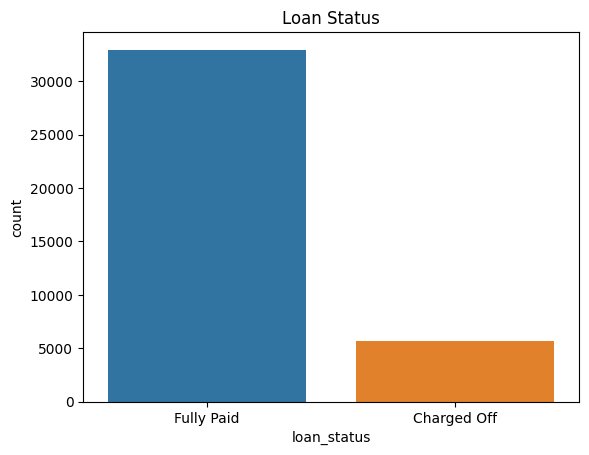

In [141]:
#plotting the target variable 'loan_status'
sns.countplot(x='loan_status',data=loan_df)
plt.title('Loan Status')
plt.show()

Observation : Out of 38577 records, 85.4% records have loan_status as 'Fully Paid' and 14.6% records have loan_status as 'Charged Off'. This indicates that most of the loans are paid back in full.

#### Univarite Analysis of Numerical Variables

1. Loan Amount

In [142]:
#summary of loan amount
loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

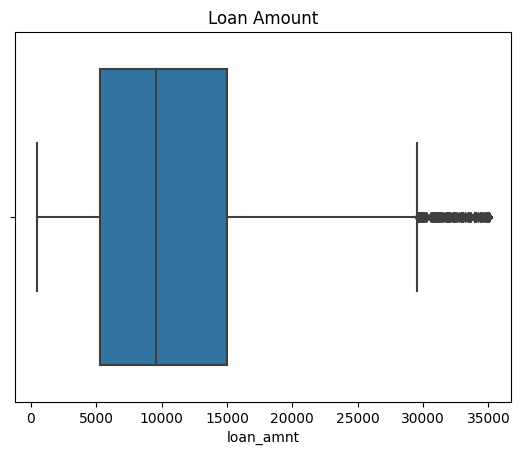

In [143]:
#plotting the box plot for loan amount
sns.boxplot(x='loan_amnt',data=loan_df)
plt.title('Loan Amount')
plt.show()

Observation : The loan amount has mean value of 11047.02 and median value of 9600.00. The distribution of loan amount is right skewed i.e. highly skewed towards lower values. The maximum loan amount is 35000.00 and minimum loan amount is 500.00. 

2. Interest Rate

In [144]:
#Summary of interest rate
loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

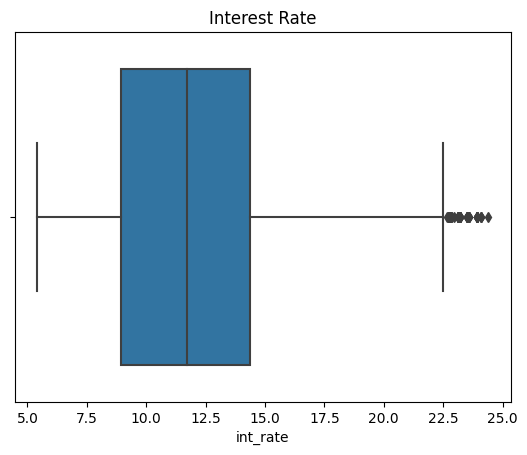

In [145]:
#box plot for interest rate
sns.boxplot(x='int_rate',data=loan_df)
plt.title('Interest Rate')
plt.show()

Observation: The interest rate is between 5.42% and 24.40% with mean value of 11.93% and median value of 11.71%. 

3. Annual Income

In [146]:
#summary of annual income
loan_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

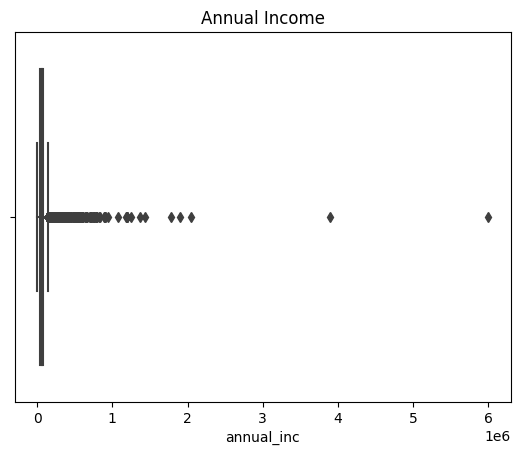

In [147]:
#box plot for annual income
sns.boxplot(x='annual_inc',data=loan_df)
plt.title('Annual Income')
plt.show()

From the above plot, it is evident that outliers are present in the annual income column. We will remove the outliers and plot the distribution again.

In [148]:
#checking the quantiles of annual income
loan_df['annual_inc'].quantile([0.25,0.5,0.75,0.95,0.99])

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [149]:
#removing the outliers from the annual income column above the 99th quantile
loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]

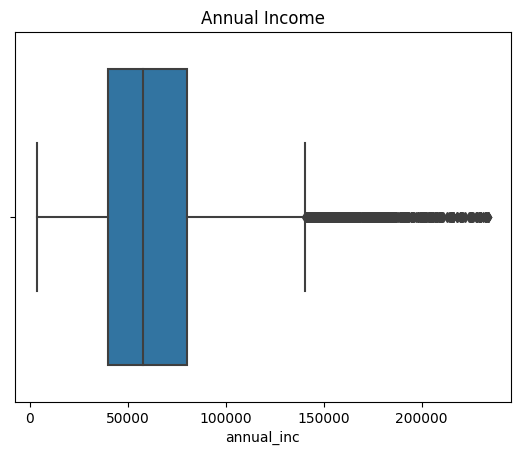

In [150]:
#box plot for annual income
sns.boxplot(x='annual_inc',data=loan_df)
plt.title('Annual Income')
plt.show()

Observation : About 75% of the data has annual income of upto $82000.00. 

4. Debt to Income Ratio

In [151]:
#summary of dti
loan_df['dti'].describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

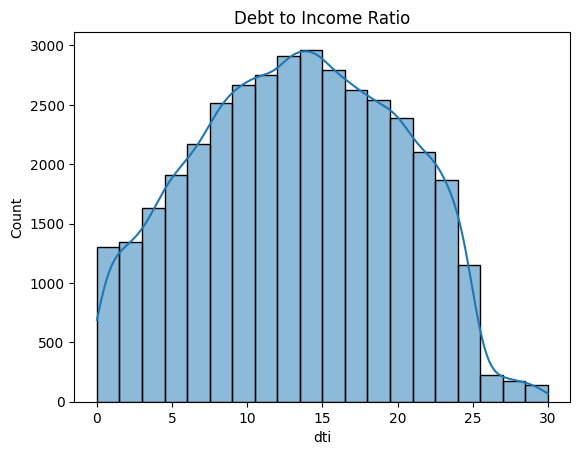

In [152]:
#histogram for dti
sns.histplot(loan_df['dti'], kde=True, bins=20)
plt.title('Debt to Income Ratio')
plt.show()

Observation : The debt to income ratio is between 0.00% and 29.99% with mean value of 13.33% and median value of 13.43%. Lower debt to income ratio indicates higher creditworthiness of the borrower.

5. Revolving Utilization

In [153]:
#checking the summary of revol_util
loan_df['revol_util'].describe()

count    38142.000000
mean        48.692548
std         28.336023
min          0.000000
25%         25.200000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

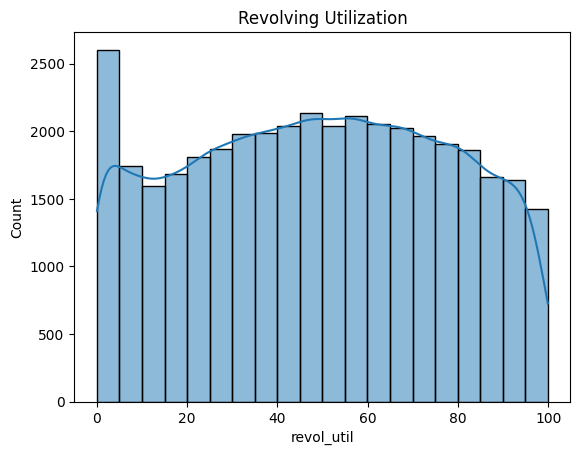

In [154]:
#histogram for revol_util
sns.histplot(loan_df['revol_util'], kde=True, bins=20)
plt.title('Revolving Utilization')
plt.show()

Observation : The mean value of revol_util is 48.69, indicating that on average, borrowers are utilizing roughly half of their available revolving credit. it varies widely across the borrower population and may have implications for their ability to repay their debts.

### Univariate Analysis of Categorical Variables

1.  Term

In [155]:
#checking the percentage of each category in the term column
(loan_df['term'].value_counts()/len(loan_df))*100

 36 months    75.460187
 60 months    24.539813
Name: term, dtype: float64

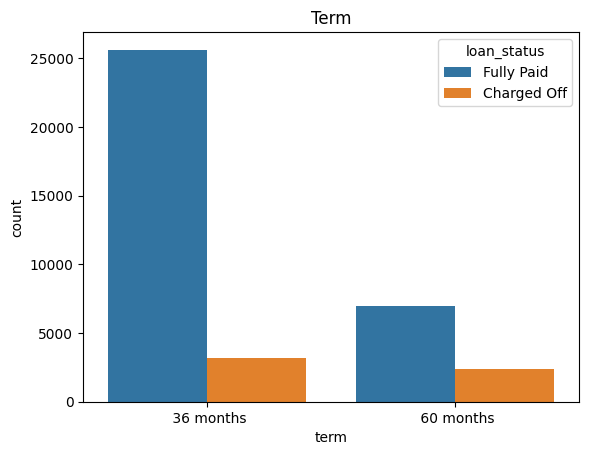

In [156]:
#plotting the count plot for term
sns.countplot(x='term', hue = 'loan_status', data=loan_df)
plt.title('Term')
plt.show()

Observation : Borrowers have taken loan for 36 months in 75.46% of the cases and for 60 months in 24.54% of the cases. Also charge off rate is higher for 60 months term loans.

2. Home Ownership

In [157]:
#checking the value counts of home_ownership column
loan_df['home_ownership'].value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

We have 3 columns with None value. We will replace None with Other.

In [158]:
#replace the NONE value with OTHER
loan_df['home_ownership'] = loan_df['home_ownership'].replace('NONE','OTHER')

In [159]:
#checking the value counts of home_ownership column
loan_df['home_ownership'].value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          99
Name: home_ownership, dtype: int64

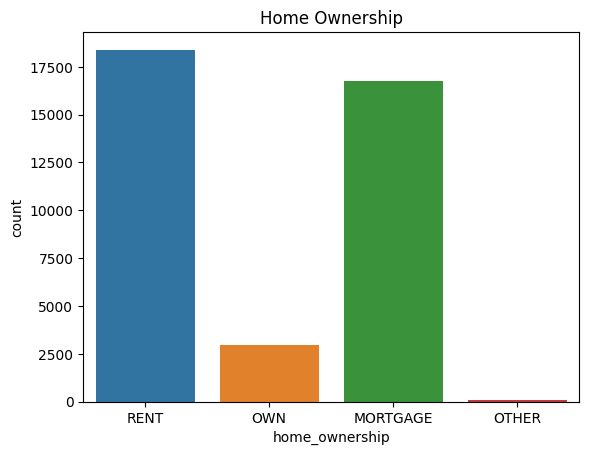

In [160]:
#plotting the count plot for home_ownership
sns.countplot(x='home_ownership' , data=loan_df)
plt.title('Home Ownership')
plt.show()

Observation : Most of the borrowers have rent or Moragage as their home ownership type.

3. Purpose

In [161]:
#checking the value counts of purpose column
loan_df['purpose'].value_counts()

debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: purpose, dtype: int64

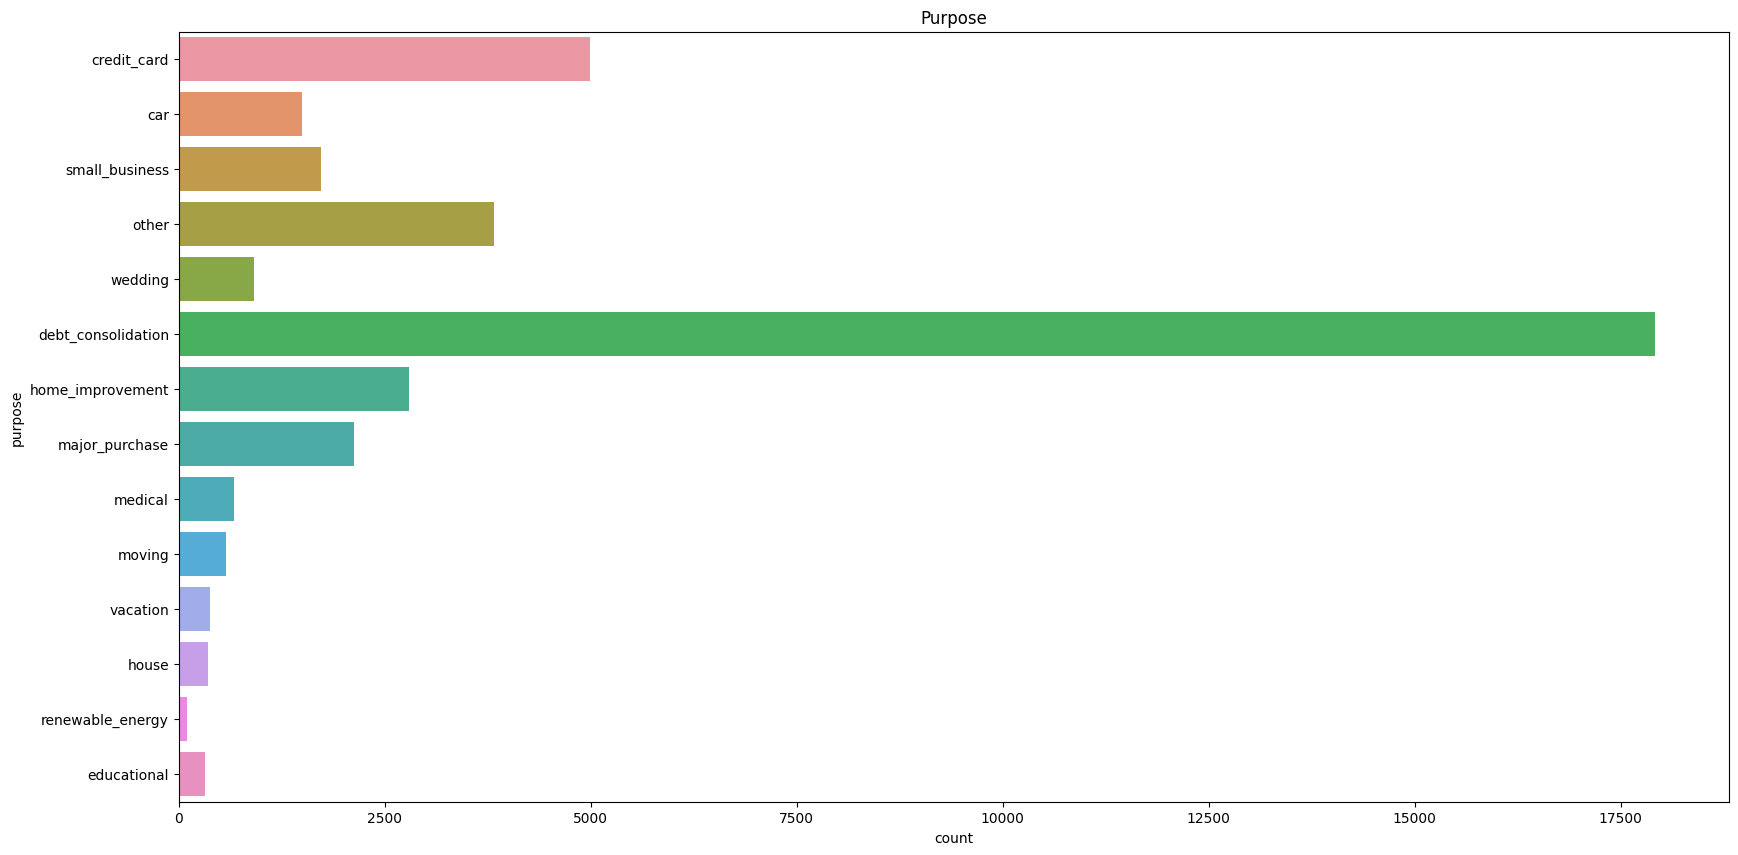

In [162]:
#plotting the count plot for purpose
plt.figure(figsize=(20,10))
sns.countplot(y='purpose', data=loan_df)
plt.title('Purpose')
plt.show()

Observation : Most of the borrowers have taken loan for debt consolidation purpose followed by credit card.

4. issue_d

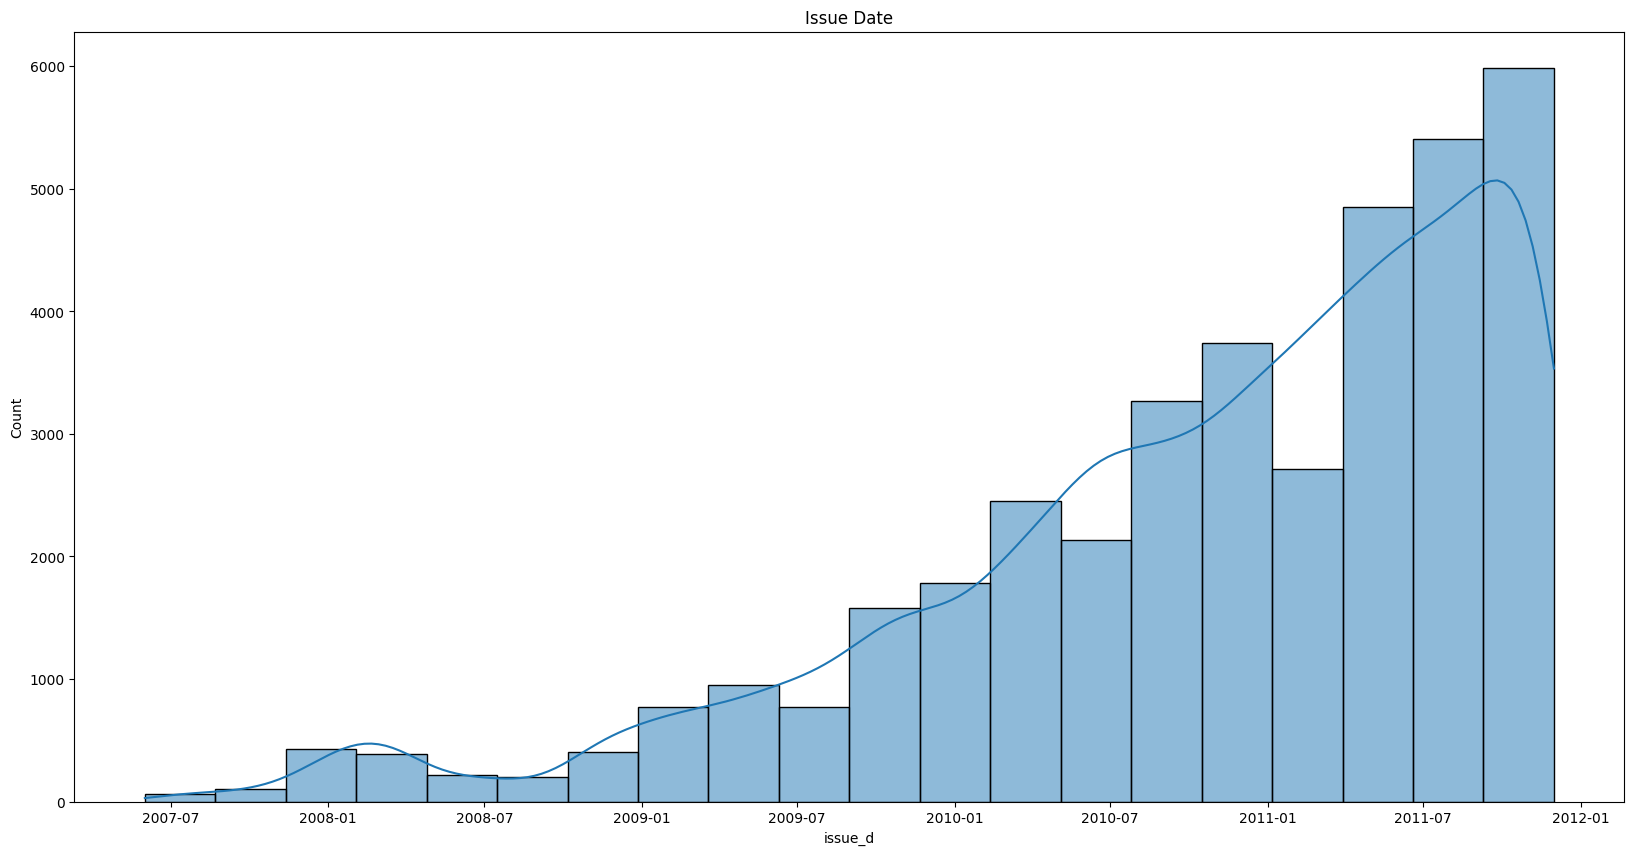

In [163]:
#plotting the histogram for issue_d
plt.figure(figsize=(20,10))
sns.histplot(x='issue_d', data=loan_df, kde=True, bins=20)
plt.title('Issue Date')
plt.show()

Observation : The count of loans issued keeps increasing over the years indicating that the company is growing.

5. pub_rec_bankruptcies

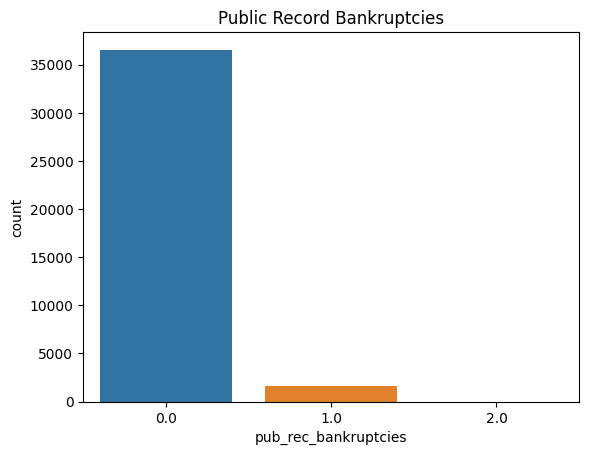

In [164]:
#plotting the count plot for pub_rec_bankruptcies
sns.countplot(x='pub_rec_bankruptcies', data=loan_df)
plt.title('Public Record Bankruptcies')
plt.show()

Observation : Most of the borrowers have 0 public record bankruptcies.

### Bivariate Analysis

Creating the buckets for loan amount, annual income, interest rate, debt to income ratio and revolving utilization for better bivariate analysis.


In [165]:
#creating bins for loan amount
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K'])

#creating bins for annual income
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=[0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000], labels=['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K-180K', '180K-210K', '210K-240K'])

#creating bins for interest rate
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%'])

#creating bins for dti
loan_df['dti'] = pd.cut(loan_df['dti'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%'])

#creating bins for revol_util
loan_df['revol_util_bin'] = pd.cut(loan_df['revol_util'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])